<a href="https://colab.research.google.com/github/JDVAR7/2160-aprendiendo-a-clasificar-datos-con-ml/blob/main/Clasificacion_primeros_pasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [2]:
markinv = pd.read_csv('/content/marketing_inversiones.csv')

In [3]:
markinv.head()

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si


Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [4]:
markinv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [13]:
markinv = markinv.rename(columns = {'estado_civil':'Estado Civil', 'default':'Deudor', 'ultimo_contacto': 'Ultimo Contacto', 'ct_contactos': 'Cantidad Contactos','adherencia_inversion': 'Adherencia Inversión'})

In [14]:
markinv.head()

,edad,Estado Civil,escolaridad,Deudor,saldo,prestatario,Ultimo Contacto,Cantidad Contactos,Adherencia Inversión
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si


## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

In [15]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('winter')
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

In [25]:
fig = px.histogram(markinv, x = 'Adherencia Inversión', text_auto=True)
fig.update_xaxes(tickfont_color='lightcoral')
fig.update_yaxes(tickfont_color='lightcoral')
fig.show()

In [29]:
fig = px.histogram(markinv, x = 'Estado Civil', text_auto=True, color = 'Adherencia Inversión', barmode='group')
fig.update_xaxes(tickfont_color='lightgray')
fig.update_yaxes(tickfont_color='darkgray')
fig.show()

In [30]:
fig = px.histogram(markinv, x = 'escolaridad', text_auto=True, color = 'Adherencia Inversión', barmode='group')
fig.update_xaxes(tickfont_color='lightgray')
fig.update_yaxes(tickfont_color='darkgray')
fig.show()

In [31]:
fig = px.histogram(markinv, x = 'prestatario', text_auto=True, color = 'Adherencia Inversión', barmode='group')
fig.update_xaxes(tickfont_color='lightgray')
fig.update_yaxes(tickfont_color='darkgray')
fig.show()

In [33]:
fig = px.histogram(markinv, x = 'Deudor', text_auto=True, color = 'Adherencia Inversión', barmode='group')
fig.update_xaxes(tickfont_color='lightgray')
fig.update_yaxes(tickfont_color='darkgray')
fig.show()

### Variables numéricas

In [35]:
fig = px.box(markinv, x='edad', color='Adherencia Inversión')
fig.update_xaxes(tickfont_color='royalblue')
fig.show()

In [36]:
fig = px.box(markinv, x='saldo', color='Adherencia Inversión')
fig.update_xaxes(tickfont_color='royalblue')
fig.show()

In [37]:
fig = px.box(markinv, x='Ultimo Contacto', color='Adherencia Inversión')
fig.update_xaxes(tickfont_color='royalblue')
fig.show()

In [41]:
fig = px.box(markinv, x='Cantidad Contactos', color='Adherencia Inversión')
fig.update_xaxes(tickfont_color='purple')
fig.show()

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [42]:
markinv

,edad,Estado Civil,escolaridad,Deudor,saldo,prestatario,Ultimo Contacto,Cantidad Contactos,Adherencia Inversión
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


In [43]:
X = markinv.drop('Adherencia Inversión', axis=1)
y = markinv['Adherencia Inversión']

In [47]:
type(X)

pandas.core.frame.DataFrame

In [46]:
type(y)

pandas.core.series.Series

## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

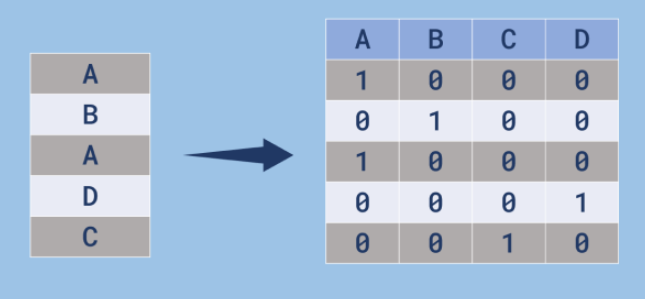

In [48]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [49]:
columnas = X.columns

In [50]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
 ['Estado Civil',	'escolaridad',	'Deudor', 'prestatario']),
  remainder='passthrough',sparse_threshold=0, force_int_remainder_cols=False)

In [51]:
X = one_hot.fit_transform(X)

In [52]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__Estado Civil_casado (a)',
       'onehotencoder__Estado Civil_divorciado (a)',
       'onehotencoder__Estado Civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__Deudor_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__Ultimo Contacto',
       'remainder__Cantidad Contactos'], dtype=object)

In [54]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__Estado Civil_casado (a),onehotencoder__Estado Civil_divorciado (a),onehotencoder__Estado Civil_soltero (a),onehotencoder__escolaridad_primaria,onehotencoder__escolaridad_secundaria,onehotencoder__escolaridad_superior,onehotencoder__Deudor_si,onehotencoder__prestatario_si,remainder__edad,remainder__saldo,remainder__Ultimo Contacto,remainder__Cantidad Contactos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
label_encoder = LabelEncoder()

In [58]:
y = label_encoder.fit_transform(y)

In [59]:
y

array([1, 1, 0, ..., 1, 1, 1])

# 3 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [93]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [80]:
from sklearn.dummy import DummyClassifier

In [95]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.6025236593059937

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
modelo_arbol = DecisionTreeClassifier(random_state=7)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [97]:
modelo_arbol.score(X_test, y_test)

0.7034700315457413

In [85]:
from sklearn.tree import plot_tree

```python
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']
```

In [86]:
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']

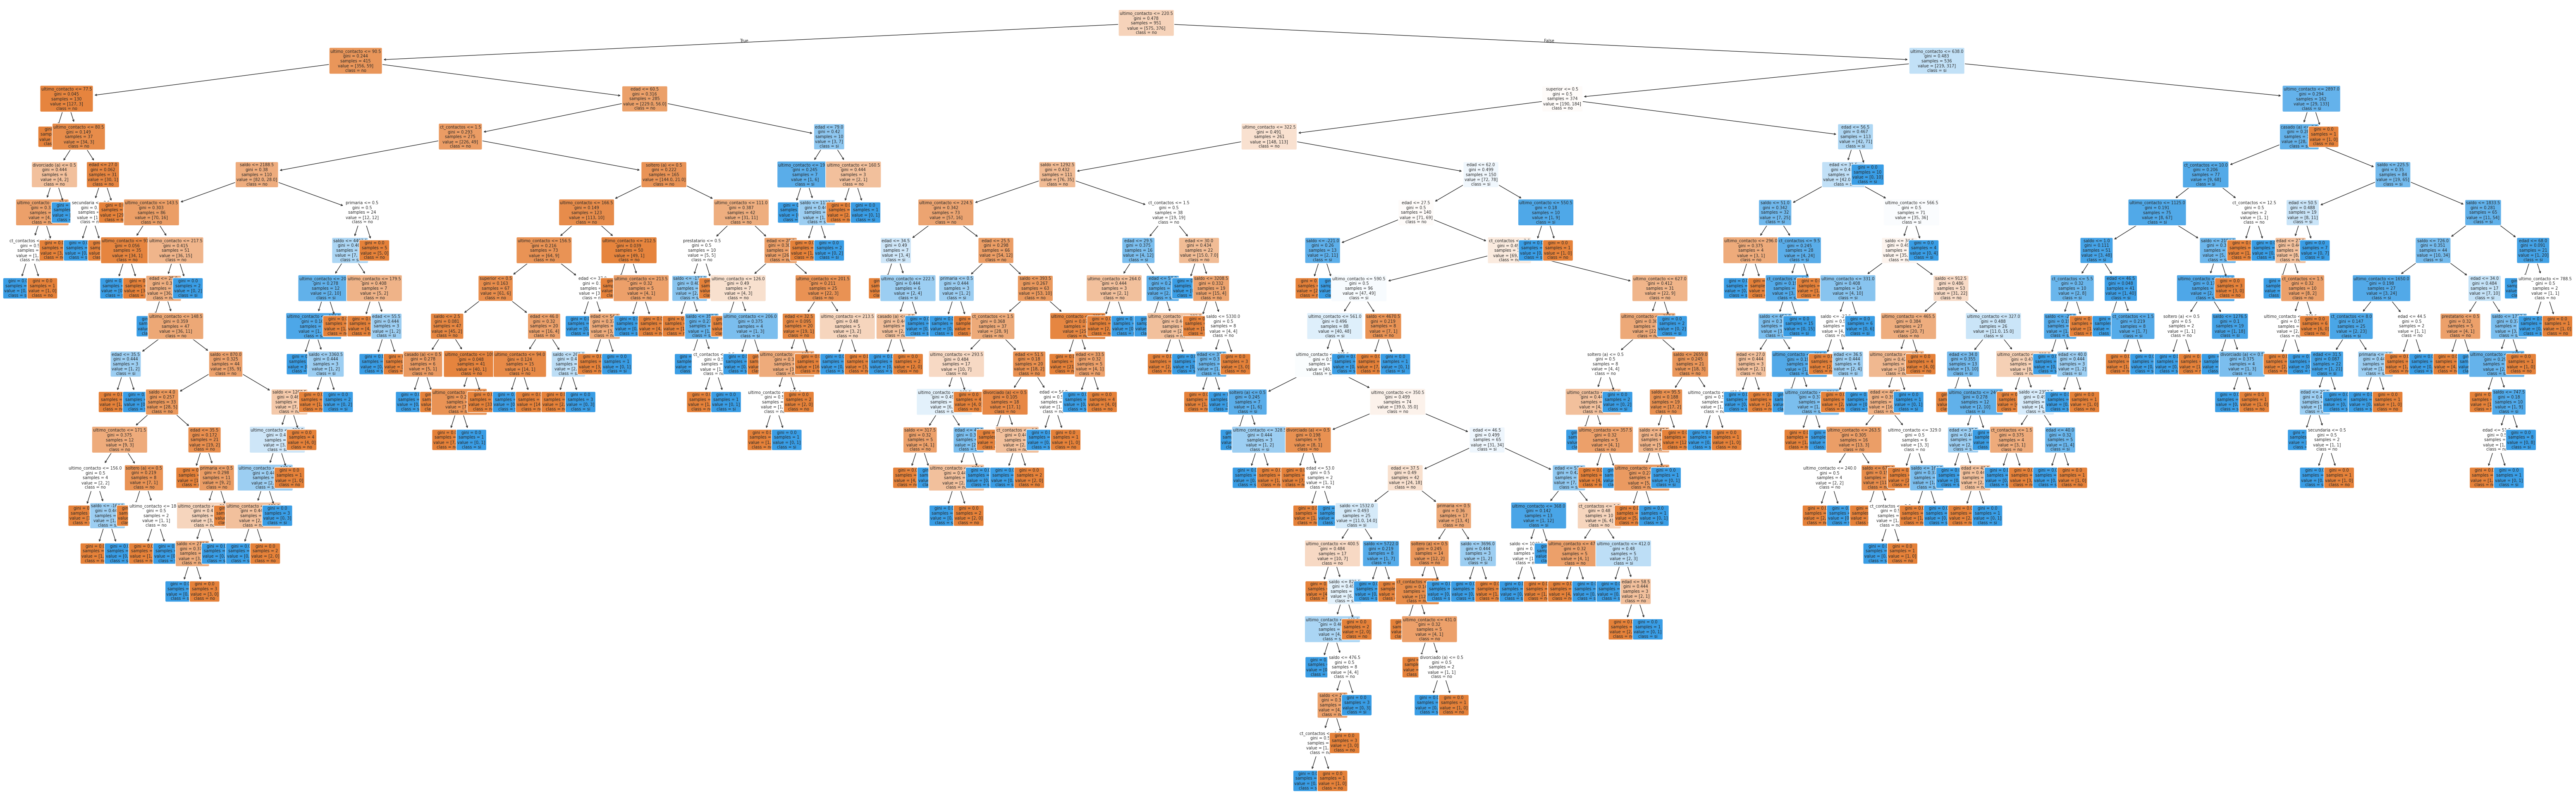

In [98]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol, class_names=['no','si'],feature_names=valores_columnas, filled=True, rounded=True, fontsize=7)
plt.show()

In [99]:
modelo_arbol.score(X_train, y_train)

1.0

In [115]:
modelo_arbol = DecisionTreeClassifier(max_depth=5, random_state=7)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=7)

In [116]:
modelo_arbol.score(X_test, y_test)

0.7634069400630915

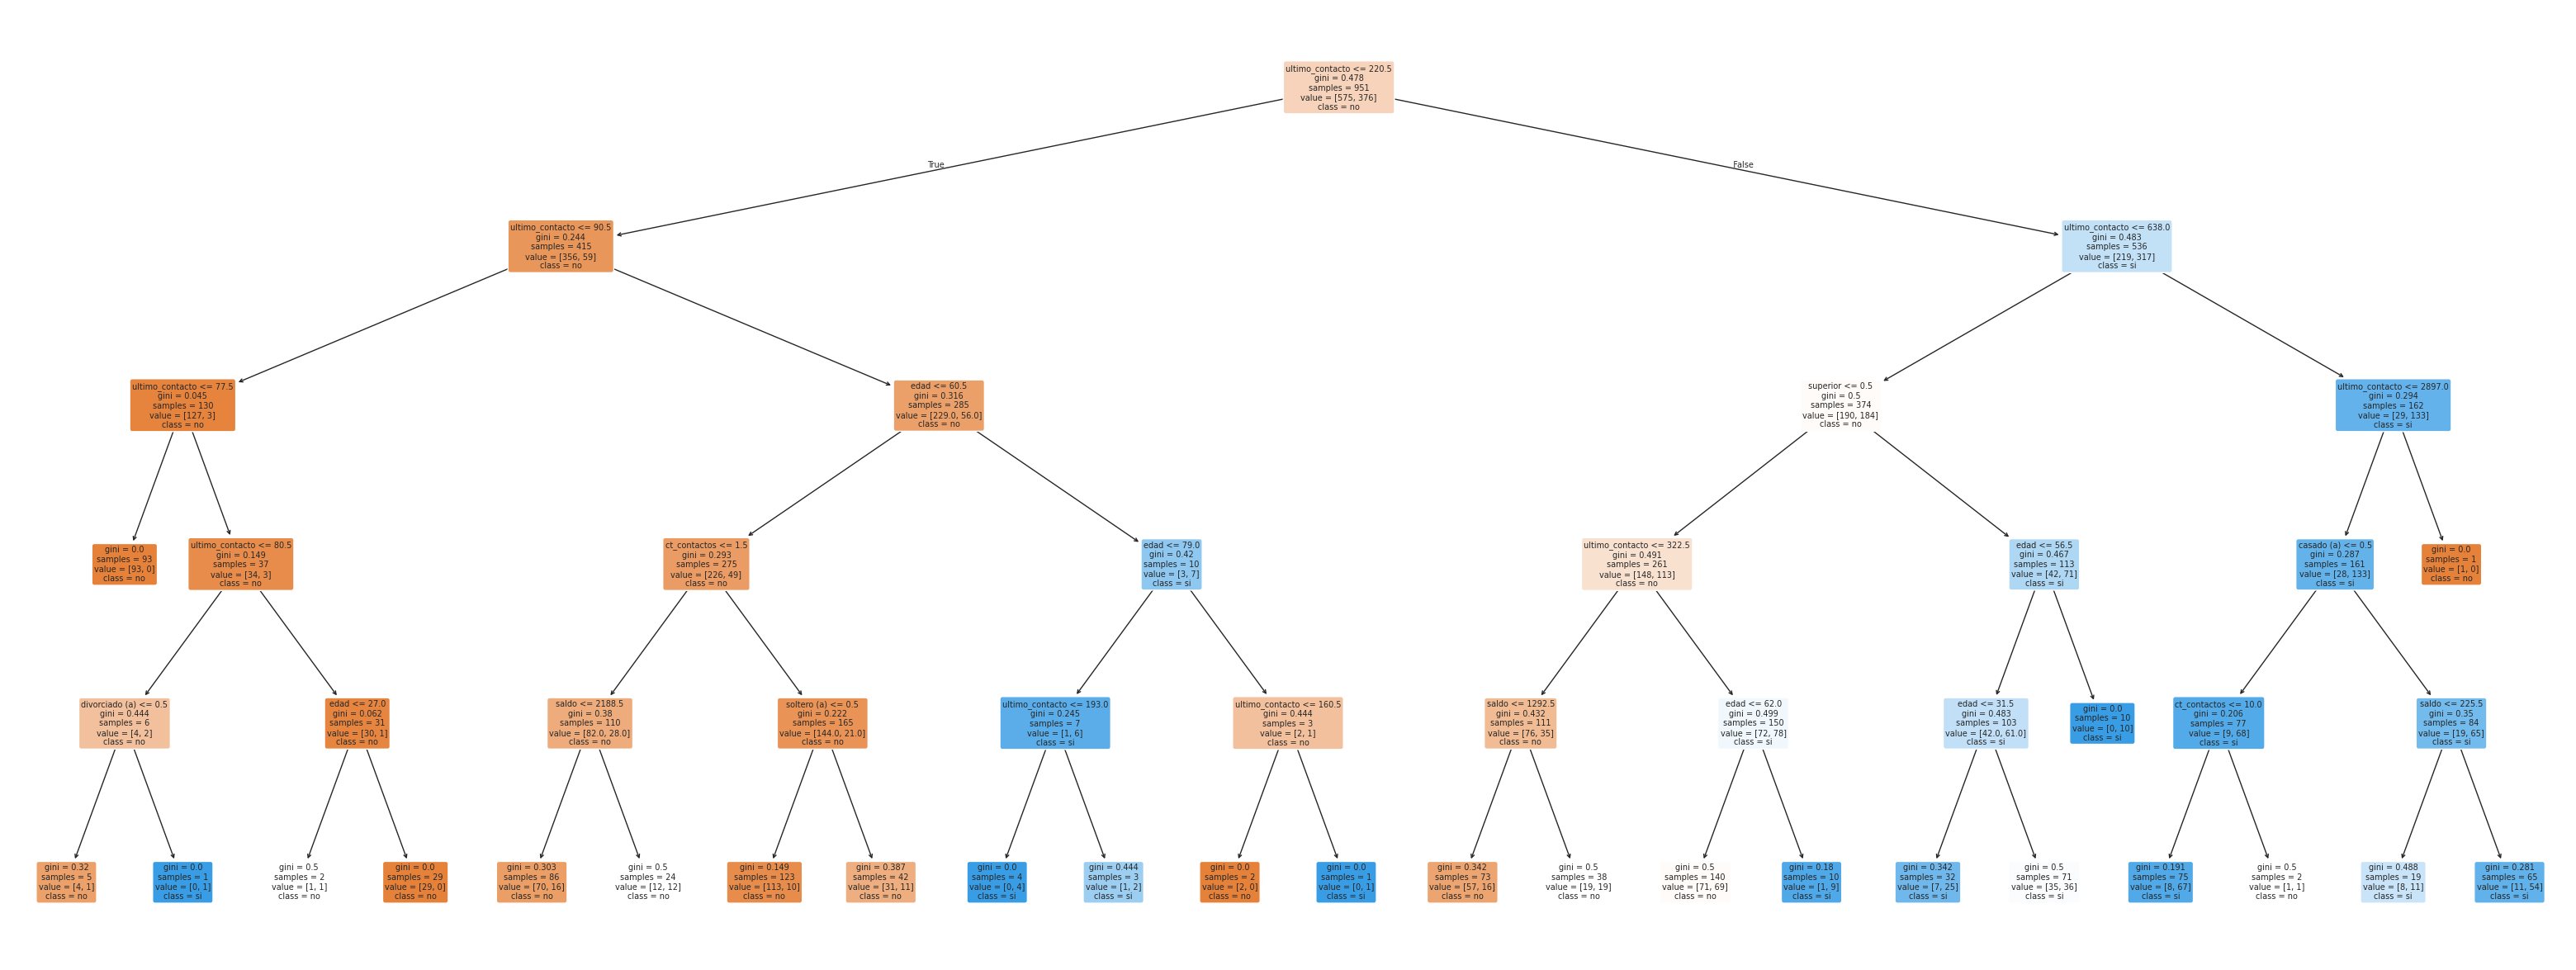

In [117]:
plt.figure(figsize=(40,15))
plot_tree(modelo_arbol, class_names=['no','si'],feature_names=valores_columnas, filled=True, rounded=True, fontsize=7)
plt.show()

In [118]:
modelo_arbol.score(X_train, y_train)

0.7613038906414301

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
normalizacion = MinMaxScaler()
X_train_normali = normalizacion.fit_transform(X_train)
X_test_normali = normalizacion.transform(X_test)

In [123]:
pd.DataFrame(X_train_normali)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.123077,0.071017,0.186755,0.000000
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.400000,0.042653,0.085762,0.000000
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.400000,0.031264,0.072848,0.032258
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.323077,0.090787,0.486093,0.000000
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.630769,0.042653,0.048344,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
946,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.415385,0.062034,0.389404,0.096774
947,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.584615,0.049549,0.059603,0.096774
948,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.476923,0.081945,0.014901,0.000000
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.984615,0.042653,0.044702,0.290323


## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn = KNeighborsClassifier()
knn.fit(X_train_normali, y_train)

KNeighborsClassifier()

In [126]:
X_test_normali = normalizacion.transform(X_test)

In [127]:
knn.score(X_test_normali, y_test)

0.6813880126182965

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [128]:
lista = [('dummy',dummy, X_test), ('arbol',modelo_arbol, X_test), ('knn',knn, X_test_normali)]
for i in lista:
  print(f'La exactitud del modelo {i[0]} es: {i[1].score(i[2], y_test)}')

La exactitud del modelo dummy es: 0.6025236593059937
La exactitud del modelo arbol es: 0.7634069400630915
La exactitud del modelo knn es: 0.6813880126182965


In [130]:
import pickle as pkl

In [132]:
with open('modelo_onehotEn.pkl', 'wb') as archivo:
  pkl.dump(one_hot, archivo)

In [131]:
with open('modelo_final.pkl', 'wb') as archivo:
  pkl.dump(modelo_arbol, archivo)

In [133]:
markinv

,edad,Estado Civil,escolaridad,Deudor,saldo,prestatario,Ultimo Contacto,Cantidad Contactos,Adherencia Inversión
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


```python
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}
```

In [134]:
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}

In [136]:
N_markinv = pd.DataFrame(nuevo_dato)
N_markinv

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,soltero (a),superior,no,23040,no,800,4


In [143]:
N_markinv = N_markinv.rename(columns = {'estado_civil':'Estado Civil', 'default':'Deudor', 'ultimo_contacto': 'Ultimo Contacto', 'ct_contactos': 'Cantidad Contactos'})

In [137]:
modelo_onehot = pd.read_pickle('/content/modelo_onehotEn.pkl')
modelo_arbol = pd.read_pickle('/content/modelo_final.pkl')

In [144]:
nuevo_dato_transform = modelo_onehot.transform(N_markinv)
modelo_arbol.predict(nuevo_dato_transform)

array([1])